#### Final Project Submission
* Student Name: JAMES WACHIRA MUTHEE
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Daniel Ekale


#### 1. Business Understanding
In today's digital landscape, social media platforms like Twitter serve as a crucial medium for public opinion and brand perception. Businesses and organizations need to understand how customers feel about specific entities—such as products, brands, or public figures—to make data-driven decisions. This project aims to develop an entity-level sentiment analysis model that can accurately classify tweets as Positive, Negative, or Neutral concerning a given entity. By analyzing sentiment at the entity level, businesses can gain deeper insights into customer sentiment, identify trends, manage reputations, and improve customer engagement strategies.

#### 2. Problem Statement
Businesses struggle to extract meaningful insights from social media due to the lack of entity-specific sentiment analysis. Traditional sentiment analysis classifies entire messages without focusing on a given entity. This project aims to develop an entity-level sentiment analysis model to classify tweets as Positive, Negative, or Neutral concerning a specific entity, helping businesses track sentiment trends and improve decision-making.

#### 3. Business Objectives
The purpose of this project is to create an entity-level sentiment analysis model that can accurately classify tweets as Positive, Negative, or Neutral regarding a given entity. This model will help businesses and organizations to:
* Enhance Brand and Reputation Management 
* Improve Customer Engagement Strategies 
* Support Data-Driven Decision-Making
  
### 4. Target Audience
The Target audience for this project are:
* Businesses and brands
* Marketing and PR teams
* Customer Support Teams
* Investors and Market Analysts

#### 5. Data
The Hotel Reservations dataset used in this project was obtained from https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

#### 6. Data Understanding
Before creating the model, the following steps will be taken:

* Import the relevant libraries 
* Load Twitter Sentiment Analysis dataset which is in csv
* Understand the data
* Identify and fix the missing values
* Ensure the columns have the correct data type
* Create new features that will be important for our analysis

#### 7. EDA to understand Data Distribution
EDA will be done and visualizations created to understand how the data is distributed and how features are related to one another. 


#### 8. Data Pre-processing
This step will involve transforming raw data into a structured format suitable for modeling. The following transformations will be done to the data:
1. Feature Scaling
2. Categorical Encoding
3. Label Encoding the Class Feature
4. Data Splitting

#### 9. Modelling
This step will involve creating models to predict whether a customer will cancel a booking or not. Essentially, our model will be answering our business question. In this project, three models will be created:
1. Logistic Regression - Baseline Model
2. Random Forest Model


#### 10. Model Evaluation
This step will help us assess how well our model is performing. It will allow us to understand if the model is making accurate predictions and how it will generalize to unseen data. 

#### 11. Metrics of Success
The Models' Performance will be evaluated against two metrics:
1. Accuracy Score
2. AUC

#### 12. Findings
Upon evaluation of the model based on the metrics of success, the findings of the evaluation will be highlighted

#### 13. Conclusion
The model with the highest accuracy score and AUC will be considered the most effective for predicting hotel reservation cancellations.

In [14]:
#  Setup and Data Loading
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [15]:
# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Loading the datasets

In [16]:
# Load data 
df_train = pd.read_csv('twitter_training.csv')
df_val = pd.read_csv('twitter_validation.csv')

# checking the first few rows of th training dataset
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
# checking te first few rows of the validation dataset
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


#### Data Understanding

In [19]:
# Check the column names for the training dataset
print(f"Training Set Column names : {df_train.columns}")

print(f"Validation Set Column names : {df_val.columns}")


Training Set Column names : Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Validation Set Column names : Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


From the above column names of the training dataset, it is clear those are not the actual column names but the top names of the first row of each dataset. For proper interpretation and undrstanding of the datasets, the column names need to be renamed


In [20]:
# Rename the columns for clarity in both datasets
df_train.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
df_val.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

print("Training and Validation data loaded and renamed.")
print("Training data dimensions:", df_train.shape)
print("Validation data dimensions:", df_val.shape)

Training and Validation data loaded and renamed.
Training data dimensions: (74681, 4)
Validation data dimensions: (999, 4)


In [21]:
# Checking for the data with renamed columns
df_train.head()


,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [22]:
 # Checking for missing values
print("Missing data in training set:")
print(df_train.isnull().sum())

Missing data in training set:
ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64


Only the tweet column has missing values. We shall drop the rows of the tweet column having the missing values

In [23]:
# Drop rows with missing Tweet texts
df_train = df_train.dropna(subset=['Tweet'])
print("\nAfter handling missing data, training data rows:", len(df_train))


After handling missing data, training data rows: 73995


In [24]:
# Check the data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Topic      73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


##### The dataset has one column with integer data type and three columns with text or categorical data type

#### Perfroming Exploratory Data Analysis

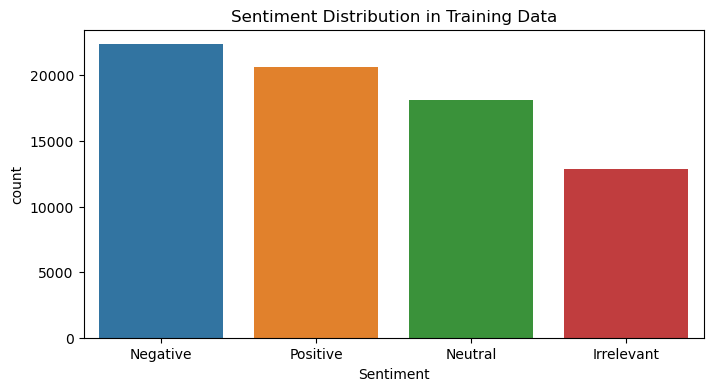

In [25]:
# Sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Sentiment', order=df_train['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution in Training Data")
plt.show()


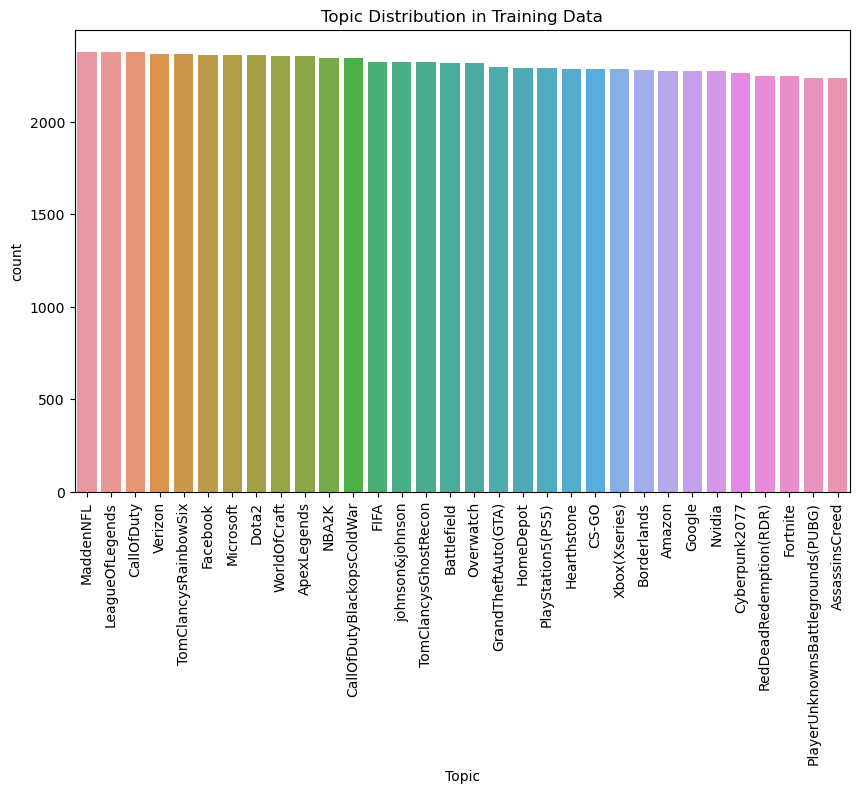

EDA complete.


In [26]:
# Topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Topic', order=df_train['Topic'].value_counts().index)
plt.title("Topic Distribution in Training Data")
plt.xticks(rotation=90)
plt.show()

print("EDA complete.")

#### NLP Preprocessing with Custom Transformer

In [28]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    
    # Lowercase text
    text = text.lower()
    
    # Remove URLs, mentions, hashtags, and punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    
    return " ".join(tokens)

print("Preprocessing function defined.")

Preprocessing function defined.


In [86]:
# Creating a function to retrieve tweets at index position 
def preprocess_tweet_at_index(df, index):
    tweet = df["Tweet"].iloc[index]

# Apply the preprocessing function to clean the tweet text
    cleaned_tweet = preprocess_text(tweet)

# Return the cleaned tweet
    return cleaned_tweet

In [87]:
# Confirming preprocessing at index 100
cleaned_tweet = preprocess_tweet_at_index(df_train, 100)
print(cleaned_tweet)

appreciate sonic concepts praxis valenzuela landaposas thread together talk multimodal listening soundwalks borderlands frameworks participatory action research testimonios many thoughtful resonant intersections


#### Building a Pipeline

In [11]:
# The pipeline will include our custom TextPreprocessor, CountVectorizer, TfidfTransformer, and Logistic Regression.
pipeline = Pipeline([
    ('preprocess', preprocess_text()),
    ('vect', CountVectorizer()),     # count vectorization
    ('tfidf', TfidfTransformer()),     # TF-IDF transformation
    ('clf', LogisticRegression(max_iter=1000))
])

In [88]:
# Check a sample transformation
sample_texts = df_train['Tweet'].head(5)
transformed_texts = pipeline.named_steps['preprocess'].transform(sample_texts)
print("Sample transformed texts:")
for text in transformed_texts:
    print(text)

Sample transformed texts:
coming borders kill
im getting borderlands kill
im coming borderlands murder
im getting borderlands 2 murder
im getting borderlands murder


In [13]:
# Split features and labels from training data
X_train = df_train['Tweet']
y_train = df_train['Sentiment']

In [91]:
# Fitting the data to the Pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess', TextPreprocessor()), ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(random_state=42))])

#### Validating the Model

In [ ]:
test_tweets = df_val["Tweet"]
actual_sentiments = df_val["Sentiment"]
predicted_sentiments = pipeline.predict(test_tweets)

print(classification_report(predicted_sentiments, actual_sentiments))


              precision    recall  f1-score   support

  Irrelevant       0.96      0.99      0.98       165
    Negative       0.98      0.97      0.98       270
     Neutral       0.97      0.98      0.97       282
    Positive       0.98      0.96      0.97       282

    accuracy                           0.97       999
   macro avg       0.97      0.98      0.97       999
weighted avg       0.97      0.97      0.97       999



In [109]:
print(accuracy_score(predicted_sentiments,actual_sentiments))

0.973973973973974


In [ ]:
# Visualizations: Confusion Matrices 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_lr = confusion_matrix(actual_sentiments, predicted_sentiments)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [21]:
# Cell 8: Conclusions and Next Steps
# ============================
print("\nConclusions:")
print("1. EDA revealed the distribution of sentiments and topics within the training set.")
print("2. The text data has been preprocessed to remove URLs, mentions, hashtags, punctuation and stopwords, along with tokenization.")
print("3. Our pipeline integrated count vectorization and TF-IDF transformation before applying Logistic Regression.")
print("4. Hyperparameter tuning via grid search improved the model's performance.")
print("5. The validation report is provided above for evaluating model performance on unseen data.")
print("Future improvements could include exploring more advanced models (e.g., SVM or deep learning), incorporating additional features, or using more complex text preprocessing techniques.")
print("Notebook complete.")


Conclusions:
1. EDA revealed the distribution of sentiments and topics within the training set.
2. The text data has been preprocessed to remove URLs, mentions, hashtags, punctuation and stopwords, along with tokenization.
3. Our pipeline integrated count vectorization and TF-IDF transformation before applying Logistic Regression.
4. Hyperparameter tuning via grid search improved the model's performance.
5. The validation report is provided above for evaluating model performance on unseen data.
Future improvements could include exploring more advanced models (e.g., SVM or deep learning), incorporating additional features, or using more complex text preprocessing techniques.
Notebook complete.


### Change Model in Pipeline to Random Forest


In [97]:
pipeline_rf = pipeline.set_params(clf=RandomForestClassifier(n_estimators=100, random_state=42))

In [98]:
# Create a param grid for parameter tuning
param_grid_rf = {
    'clf__max_depth': [10, 20, None],  # Tree depth
    'clf__min_samples_split': [2, 5, 10],  # Min samples to split
}

In [103]:
# Create grid search 
grid_search = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess', TextPreprocessor()),
                                       ('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'clf__max_depth': [10, 20, None],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [104]:
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Score:")
print(grid_search.best_score_)


Best Hyperparameters from Grid Search:
{'clf__max_depth': None, 'clf__min_samples_split': 10}

Best Cross-Validation Score:
0.44265153050881817


In [106]:
best_model = grid_search.best_estimator_
predicted_sentiments_rf = best_model.predict(test_tweets)

print("\nClassification Report on Validation Data:")
print(classification_report(actual_sentiments, predicted_sentiments_rf))


Classification Report on Validation Data:
              precision    recall  f1-score   support

  Irrelevant       1.00      0.95      0.98       171
    Negative       0.97      0.98      0.98       266
     Neutral       0.98      0.98      0.98       285
    Positive       0.96      0.97      0.97       277

    accuracy                           0.97       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



In [108]:
print(accuracy_score(actual_sentiments, predicted_sentiments_rf))

0.973973973973974


In [36]:
# Validating the results
df_val_results = pd.DataFrame({
    'Tweet': df_val['Tweet'],
    'Actual_Sentiment': actual_sentiments,
    'Predicted_Sentiment': predicted_sentiments_rf 
})

# Display the first few rows to review the results
df_val_results.head(10)

,Tweet,Actual_Sentiment,Predicted_Sentiment
0,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral,Neutral
1,@Microsoft Why do I pay for WORD when it funct...,Negative,Negative
2,"CSGO matchmaking is so full of closet hacking,...",Negative,Negative
3,Now the President is slapping Americans in the...,Neutral,Neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Negative,Negative
5,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,Positive,Positive
6,"Rocket League, Sea of Thieves or Rainbow Six: ...",Positive,Positive
7,my ass still knee-deep in Assassins Creed Odys...,Positive,Positive
8,FIX IT JESUS ! Please FIX IT ! What In the wor...,Negative,Negative
9,The professional dota 2 scene is fucking explo...,Positive,Positive


In [ ]:
# Plotting confusion matrix for the Random Forest Model
cm_rf = confusion_matrix(actual_sentiments, predicted_sentiments_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()